<a href="https://colab.research.google.com/github/LuisAFD1/AI/blob/main/AI_little_training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#create folder for each category

!mkdir spoon
!mkdir knife
!mkdir fork

mkdir: cannot create directory ‘spoon’: File exists
mkdir: cannot create directory ‘knife’: File exists
mkdir: cannot create directory ‘fork’: File exists


In [ ]:
from os import fork
# enter the folder and unzip

%cd fork
!unzip tenedor.zip
%cd ..

%cd spoon
!unzip cuchara.zip
%cd ..

%cd knife
!unzip cuchillo.zip
%cd ..


In [ ]:
#delete .zip files

!rm -rf /content/knife/cuchillo.zip
!rm -rf /content/fork/tenedor.zip
!rm -rf /content/spoon/cuchara.zip

In [ ]:
#look at how many images there are

!ls /content/fork/tenedor | wc - 1
!ls /content/spoon/cuchara | wc - 1
!ls /content/knife/cuchillo | wc - 1

    324     324    6148 -
wc: 1: No such file or directory
    324     324    6148 total
    362     362    6684 -
wc: 1: No such file or directory
    362     362    6684 total
    362     362    7146 -
wc: 1: No such file or directory
    362     362    7146 total


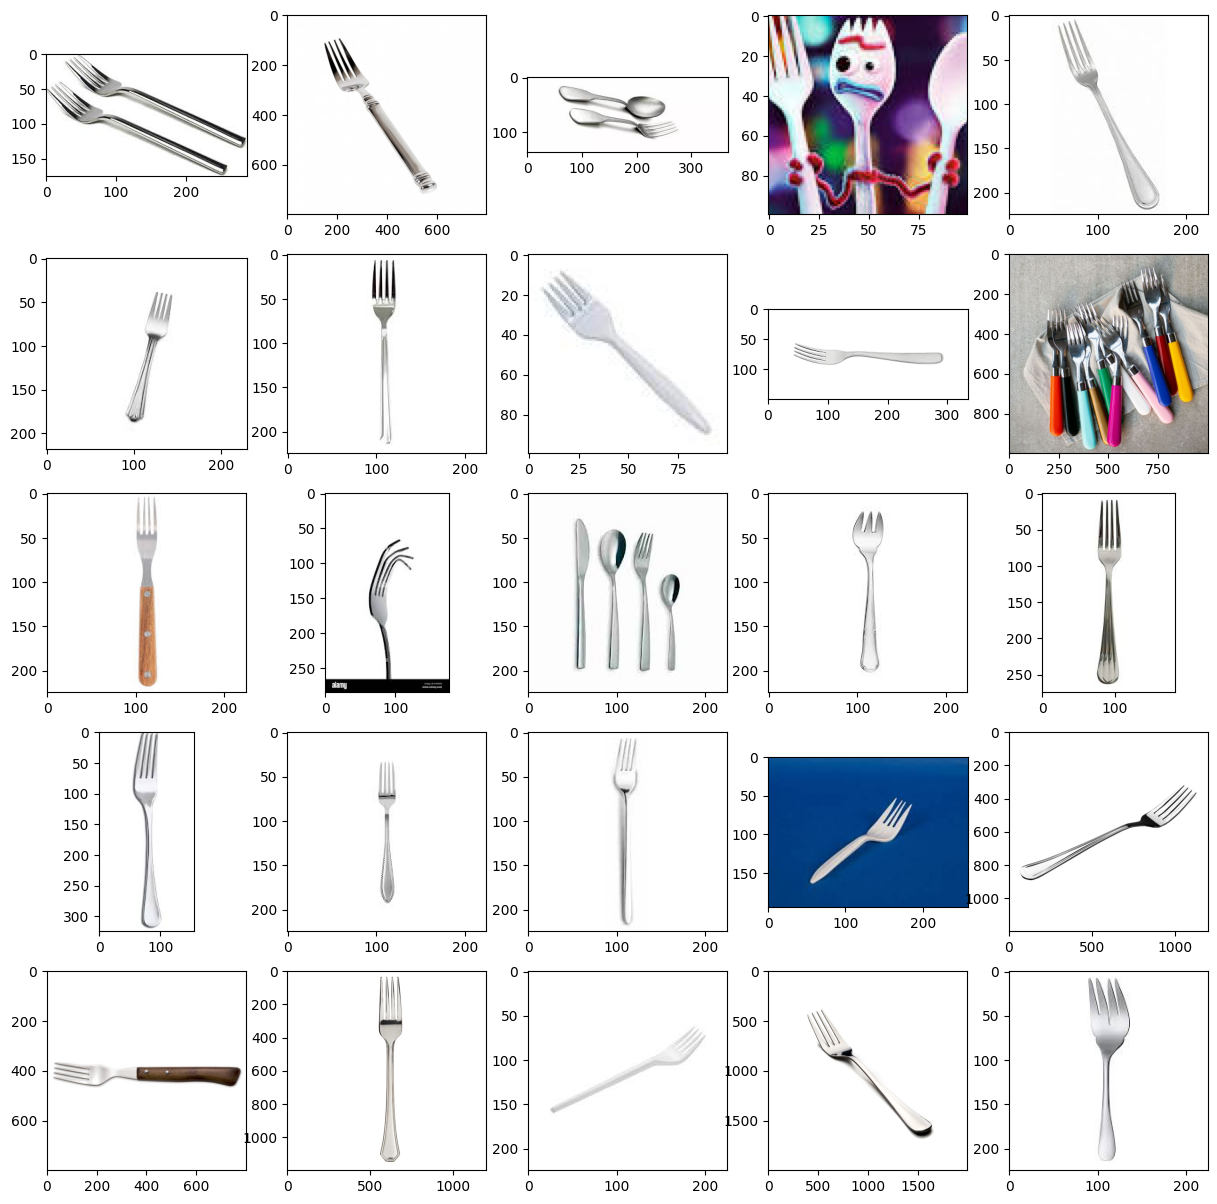

In [ ]:
#see some images of the folders

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/fork/tenedor'
#carpeta = /content/spoon/cuchara
#carpeta = /content/knife/cuchillo
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen = mpimg.imread(carpeta + '/' + nombreimg)
    plt.imshow(imagen)

In [ ]:
#create folder for data set

!mkdir dataset
!mkdir dataset/cucharas
!mkdir dataset/cuchillos
!mkdir dataset/tenedores


In [ ]:
# configuring the new folders so that they have the same number of images

import shutil
carpeta_fuente = '/content/fork/tenedor'
carpeta_destino = 'dataset/tenedores'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
    if i < 200:

      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)



In [ ]:
carpeta_fuente = '/content/spoon/cuchara'
carpeta_destino = 'dataset/cucharas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
    if i < 200:

      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)



In [ ]:
carpeta_fuente = '/content/knife/cuchillo'
carpeta_destino = 'dataset/cuchillos'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
    if i < 200:

      shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)



In [ ]:
#look at how many images there are

!ls dataset/tenedores | wc - 1
!ls dataset/cucharas | wc - 1
!ls dataset/cuchillos | wc - 1

    200     200    3790 -
wc: 1: No such file or directory
    200     200    3790 total
    200     200    3853 -
wc: 1: No such file or directory
    200     200    3853 total
    200     200    3782 -
wc: 1: No such file or directory
    200     200    3782 total


Found 479 images belonging to 3 classes.
Found 118 images belonging to 3 classes.


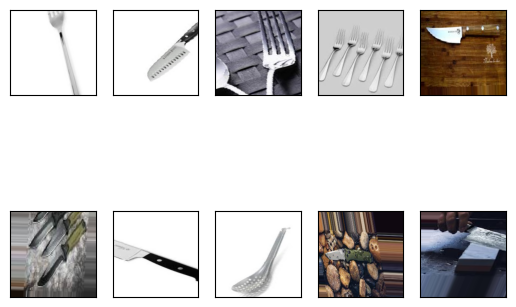

In [ ]:
# data augmentation, for when little data is available

#Data Augmentation with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Create the generator dataset
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% for testing
)

#Generators for training and test sets
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Print 10 images of the training generator
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()



In [ ]:
#import the model (which does not contain the last layer)
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

#Freeze the downloaded model
mobilenetv2.trainable = False

modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
#Compile as usual
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Train the model

EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 23s 770ms/step - loss: 0.9724 - accuracy: 0.5407 - val_loss: 0.5805 - val_accuracy: 0.7712
Epoch 2/50
15/15 [==============================] - 10s 681ms/step - loss: 0.5676 - accuracy: 0.7683 - val_loss: 0.3478 - val_accuracy: 0.9068
Epoch 3/50
15/15 [==============================] - 9s 620ms/step - loss: 0.3968 - accuracy: 0.8392 - val_loss: 0.2655 - val_accuracy: 0.9237
Epoch 4/50
15/15 [==============================] - 9s 590ms/step - loss: 0.3466 - accuracy: 0.8685 - val_loss: 0.2480 - val_accuracy: 0.9153
Epoch 5/50
15/15 [==============================] - 10s 681ms/step - loss: 0.3194 - accuracy: 0.8935 - val_loss: 0.1965 - val_accuracy: 0.9661
Epoch 6/50
15/15 [==============================] - 9s 638ms/step - loss: 0.2524 - accuracy: 0.9123 - val_loss: 0.3062 - val_accuracy: 0.8475
Epoch 7/50
15/15 [==============================] - 8s 558ms/step - loss: 0.2795 - accuracy: 0.8977 - val_loss: 0.2123 - val_accuracy: 0.9153
Epoch 8/50
15/

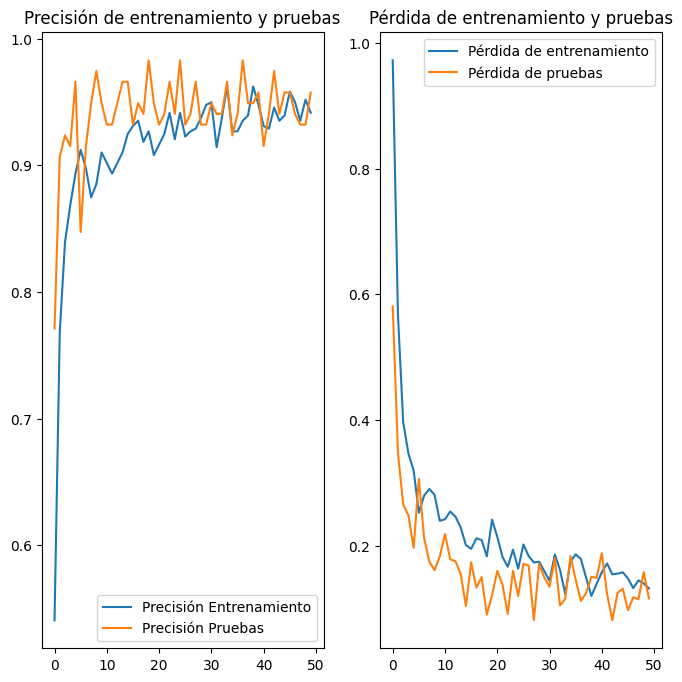

In [ ]:
#Precision graphics
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorize an internet image
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
#0 = spoons, 1 = knives, 2 = forks
url = 'https://www.ranchoel17.com/cdn/shop/products/Cuchillo1.jpg?v=1589483942' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 24ms/step
1
